<a href="https://colab.research.google.com/github/mtavakoliangit/ena/blob/main/dl_lab3_ensf411_mtavakolian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Imports

In [ ]:
!pip install -q fastbook

import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.7 MB/s 
     |████████████████████████████████| 1.2 MB 32.8 MB/s 
     |████████████████████████████████| 48 kB 3.4 MB/s 
     |████████████████████████████████| 189 kB 21.5 MB/s 
     |████████████████████████████████| 55 kB 528 kB/s 
     |████████████████████████████████| 51 kB 162 kB/s 
     |████████████████████████████████| 561 kB 13.1 MB/s 
     |████████████████████████████████| 130 kB 9.6 MB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastai.callback.fp16 import *
from fastai.callback import *

## 1. Data loading and augmentation

Create a DataBlock and DataLoaders using:
* Training and validation images collected in Lab2
* Resize(640) as item transform
* A size of 420 in the batch transforms
* Use a batch size of 32
* Use set_seed() to obtain reproducible results.
* Augmentations you find useful (see question 1)


#### 1.1 Mount google drive

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### 1.2 Create data loader

Path to read the images

In [ ]:
path = Path('gdrive/My Drive/lab2')

A glance to the subfolders

In [ ]:
path.ls()

(#3) [Path('gdrive/My Drive/lab2/valid'),Path('gdrive/My Drive/lab2/train'),Path('gdrive/My Drive/lab2/models')]

A seed for reproducibility

In [ ]:
set_seed(24)

DataBloock setup

In [ ]:
fingers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    get_y = parent_label,
    item_tfms=Resize(640),
    batch_tfms=aug_transforms(size=(420, 420), do_flip=True, max_lighting=0.2, max_warp=0.2, p_lighting=0.75, max_rotate=30.0,
                              min_zoom=0.8, max_zoom=1.0, mode='bilinear'))

Summary and info about the pipeline

In [ ]:
fingers.summary(path)

Setting-up type transforms pipelines
Found 309 items
2 datasets of sizes 254,55
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      gdrive/My Drive/lab2/train/three/00000000.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=240x480
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      gdrive/My Drive/lab2/train/three/00000000.jpg
    applying parent_label gives
      three
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(3)

Final sample: (PILImage mode=RGB size=240x480, TensorCategory(3))


Found 309 items
2 datasets of sizes 254,55
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)



Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -- {'size': (640, 640), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
    starting from
      (PILImage mode=RGB size=240x480, TensorCategory(3))
    applying Resize -- {'size': (640, 640), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} gives
      (PILImage mode=RGB size=640x640, TensorCategory(3))
    applying ToTensor gives
      (TensorImage of size 3x640x640, TensorCategory(3))

Adding the next 3 samples

No before_batch transform to apply

Collating items in a batch

Applying batch_tfms to the batch built
  Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': (420, 420), 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}
    starting from
      (TensorImage of size 4x3x640x640, T

Dataloader with bach size of 32:

In [ ]:
dls = fingers.dataloaders(path, bs=32)

### 1.3 Show a training and a validation batch. Show augmentations, i.e. show_batch() with unique=True

Reading 254 images in training folder:

In [ ]:
tns = get_image_files(path/'train')
tns

(#254) [Path('gdrive/My Drive/lab2/train/three/00000000.jpg'),Path('gdrive/My Drive/lab2/train/three/00000001.jpg'),Path('gdrive/My Drive/lab2/train/three/00000002.jpg'),Path('gdrive/My Drive/lab2/train/three/00000003.jpg'),Path('gdrive/My Drive/lab2/train/three/00000004.jpg'),Path('gdrive/My Drive/lab2/train/three/00000005.jpg'),Path('gdrive/My Drive/lab2/train/three/00000006.jpg'),Path('gdrive/My Drive/lab2/train/three/00000007.jpg'),Path('gdrive/My Drive/lab2/train/three/00000008.jpg'),Path('gdrive/My Drive/lab2/train/three/00000009.jpg')...]

Reading 55 images in validation folder:

In [ ]:
vns = get_image_files(path/'valid')
vns

(#55) [Path('gdrive/My Drive/lab2/valid/four/00000000.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000001.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000002.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000003.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000004.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000005.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000006.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000007.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000008.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000009.jpg')...]

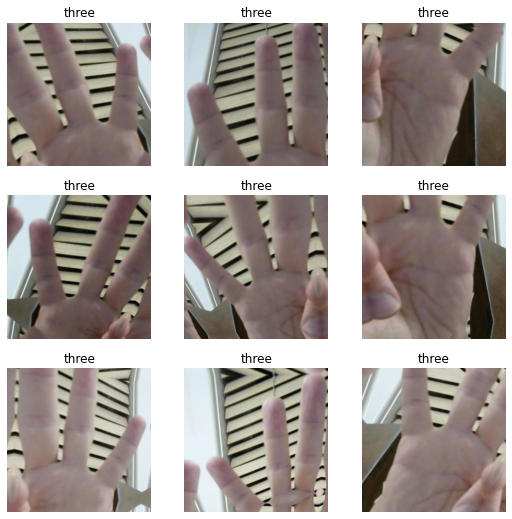

In [ ]:
dls.train.show_batch(max_n=9, nrows=3, unique=True)

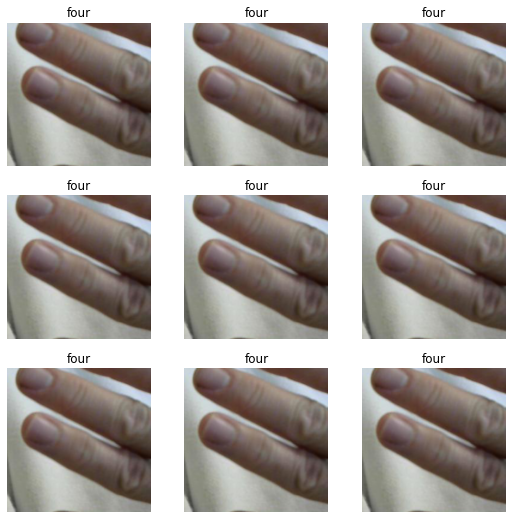

In [ ]:
dls.valid.show_batch(max_n=9, nrows=3, unique=True)

### Question 1: How did you choose your augmentation transfroms? Include your thought process.

Having referred to docs.fast.ai, I chose some augmentation techniques to keep the fingers in the picture and at the same time, alter the light, direction, zooming, etc. and also flip the images. This should provide enough alteration for the training database to avoid bias.

### Question 2: Are there any problems with your augmentations in the training data, or validation data, e.g. fingers missing, etc.?

1. Having looked at the validation sample pictures, I am not confident enough that my augmentation techniques have kept all the fingers iin the images. I avoided crop technique, but I still see some pictures are cropped, don't know why! I changed the unique to False and confirmed that the fingers are kept inside the images.
2. I could not take control of which picture or number to be taken when unique is True.

## 2. Train the classifier

### 2.1 Train a fastai cnn multi-class classifier

* ResNet18 architecture.
* accuracy as metric.
* learning rate finder to find initial learning rate.
* transfer learning with unfreezing using descriminative learning rates.
* use a batch size of 32 and the DataBlock from above.
* Use the same set_seed() as above to obtain reproducible results.

Investigate the impact of learning rate:

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

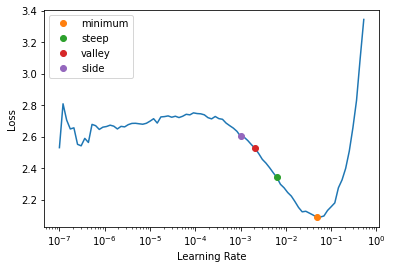

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy_multi)
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
print(f"Minimum/10:\t{lr_min:.2e}\nSteepest point:\t{lr_steep:.2e}\nLongest valley:\t{lr_valley:.2e}\nSlide interval:\t{lr_slide:.2e}")

Minimum/10:	4.79e-03
Steepest point:	6.31e-03
Longest valley:	2.09e-03
Slide interval:	1.00e-03


So, nothing much happens up to around 4e-4. Above 7e-2 the training will diverge. Based on the plot above, I choose 8e-4 where the curve has a very steep and steady inclination to drop.

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(5, 8e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.533229,2.242395,0.163636,00:15
1,2.366749,1.980760,0.290909,00:10
2,2.189256,1.900100,0.309091,00:10
3,2.024267,1.847284,0.400000,00:10
4,1.919149,1.804473,0.400000,00:10


Let's unfreeze the model:

In [ ]:
learn.unfreeze()

And find the discriminative learning rates:

SuggestedLRs(valley=0.0002754228771664202)

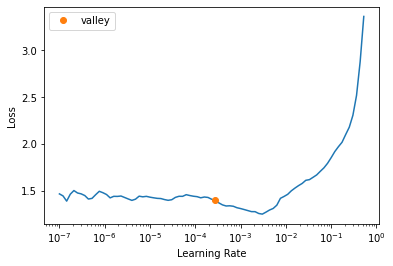

In [ ]:
learn.lr_find()

Let's choose 5e-5 as the maximum learning rate, for after unfreezing, to make sure that we are appropriately away from the divergence point. 

In [ ]:
learn.fit_one_cycle(7, lr_max=5e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.200156,1.712875,0.400000,00:13
1,1.292913,1.584164,0.454545,00:13
2,1.250684,1.578699,0.436364,00:13
3,1.270380,1.639018,0.400000,00:13
4,1.293788,1.556348,0.400000,00:13
5,1.271809,1.463625,0.418182,00:13
6,1.286385,1.459101,0.418182,00:13


### 2.3 Discriminative Learning Rates

Using Python slice object anywhere that a learning rate is expected. The first value (1e-6) passed will be the learning rate in the earliest layer of the neural network, and the second value (1e-4) will be the learning rate in the final layer. The layers in between will have learning rates that are multiplicatively equidistant throughout that range.

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(3, 8e-4)
learn.unfreeze()
learn.fit_one_cycle(15, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,2.873310,2.011276,0.218182,00:10
1,2.558908,1.595248,0.381818,00:10
2,2.312109,1.555542,0.363636,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.716503,1.614017,0.436364,00:13
1,1.814069,1.601455,0.400000,00:13
2,1.742797,1.605875,0.400000,00:13
3,1.758702,1.598571,0.527273,00:13
4,1.709680,1.593414,0.509091,00:13
5,1.698100,1.608608,0.509091,00:13
6,1.667616,1.598441,0.490909,00:13
7,1.600471,1.595652,0.490909,00:13
8,1.570981,1.591441,0.472727,00:13
9,1.528056,1.587976,0.509091,00:13


Graph of the training and validation loss:

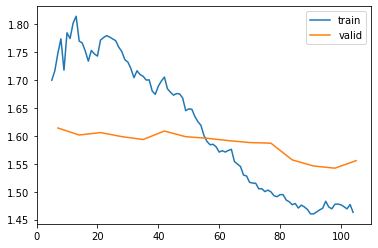

In [ ]:
learn.recorder.plot_loss()

As can be seen above, the training loss keeps getting better and better, and gets stable. Validation and training losses improvement stays almost stable. So, let's stop the training here and stick to 14 as the optimum number of epochs. 

### 2.4 Choosing the number of epochs to train for while frozen

Let's try 3, 5 and 7 and see which one gives us better result.

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy, lr=8e-4)
learn.fine_tune(14, freeze_epochs=5)

epoch,train_loss,valid_loss,accuracy,time
0,2.569021,1.784978,0.327273,00:10
1,2.362203,1.661957,0.327273,00:10
2,2.280537,1.630600,0.418182,00:10
3,2.029913,1.712406,0.400000,00:10
4,1.852204,1.533160,0.454545,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.280989,1.519359,0.436364,00:13
1,1.199842,1.651031,0.472727,00:13
2,1.101413,1.931055,0.400000,00:13
3,1.063853,2.108414,0.454545,00:13
4,1.030024,1.768113,0.454545,00:13
5,0.954426,1.744344,0.454545,00:13
6,0.898448,1.816090,0.418182,00:13
7,0.815664,1.916700,0.454545,00:13
8,0.773946,1.891007,0.454545,00:13
9,0.721905,1.814658,0.454545,00:13


In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy, lr=8e-4)
learn.fine_tune(14, freeze_epochs=7)

epoch,train_loss,valid_loss,accuracy,time
0,2.776676,2.587169,0.200000,00:10
1,2.648440,1.949422,0.200000,00:10
2,2.505499,1.710230,0.363636,00:10
3,2.312752,1.660558,0.363636,00:10
4,2.080209,1.587021,0.472727,00:10
5,1.902874,1.563227,0.400000,00:10
6,1.728262,1.758447,0.418182,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.012542,1.897993,0.363636,00:13
1,0.964012,1.886874,0.436364,00:13
2,0.909459,1.707672,0.436364,00:13
3,0.886555,1.959831,0.454545,00:13
4,0.847297,2.355589,0.418182,00:13
5,0.808775,2.321537,0.436364,00:13
6,0.791378,2.165143,0.472727,00:13
7,0.748286,2.396572,0.436364,00:13
8,0.710019,2.511570,0.400000,00:13
9,0.655524,2.446152,0.381818,00:13


In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy, lr=8e-4)
learn.fine_tune(14, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,2.842466,2.284263,0.200000,00:10
1,2.457653,2.114537,0.163636,00:10
2,2.231815,1.778843,0.218182,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.402644,1.779290,0.309091,00:13
1,1.389512,1.736125,0.345455,00:13
2,1.300565,1.798715,0.400000,00:13
3,1.265000,1.922495,0.436364,00:13
4,1.157852,2.002074,0.400000,00:13
5,1.117831,2.121817,0.418182,00:13
6,1.076338,1.944766,0.490909,00:13
7,1.001560,1.829576,0.545455,00:13
8,0.915294,1.884923,0.545455,00:13
9,0.860858,1.834608,0.563636,00:13


Thus, it looks like that 3 is the optimum due to higher accuracy and lower valid_loss. So, let's show some results.

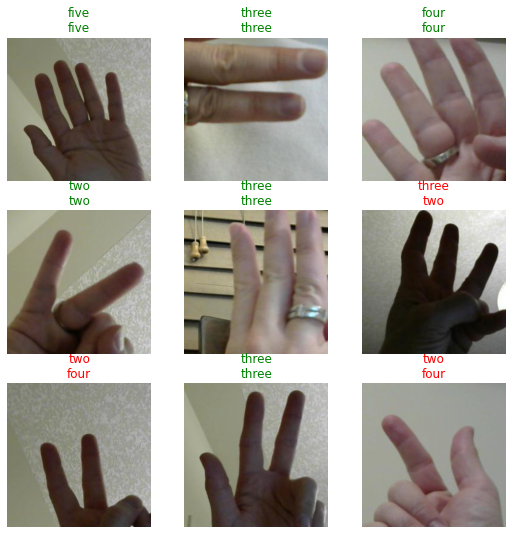

In [ ]:
learn.show_results()

### Question 3: How did you select the number of epochs and learning rates?
Learning rate: Using the lr_find() and visualisation (plotting) technique to investigate the ipmpact of different learning rates on model convergence and learning. I then used discriminative learning rates to use a smaller lr for the first layer and a bigger one for the rest.
Number of epochs: Using fit_one_cycle(), watching and plotting the results to find the optimum number of epochs; also, trying a few feeze_epochs to improve the number of epochs while frozen.

### 2.3 Experiment with different batch sizes

Using the pipeline, number of epochs, learning rates from above, re-run the pipeline with a batch size of 16, 64

#### 2.3.1 Batch size of 16

In [ ]:
batch_size = 16
dls = fingers.dataloaders(path, bs=batch_size)

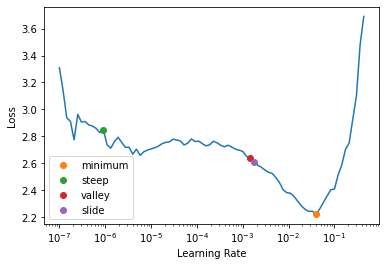

In [ ]:
learn1 = cnn_learner(dls, resnet18, metrics=accuracy_multi)
lr_min, lr_steep, lr_valley, lr_slide = learn1.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
print(f"Minimum/10:\t{lr_min:.2e}\nSteepest point:\t{lr_steep:.2e}\nLongest valley:\t{lr_valley:.2e}\nSlide interval:\t{lr_slide:.2e}")

Minimum/10:	3.98e-03
Steepest point:	9.12e-07
Longest valley:	1.45e-03
Slide interval:	1.74e-03


Chose 2e-3 as the optimum lr

In [ ]:
learn1 = cnn_learner(dls, resnet18, metrics=accuracy)
learn1.fit_one_cycle(5, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.775893,1.758841,0.345455,00:11
1,2.160317,1.605653,0.418182,00:11
2,1.831978,1.523677,0.490909,00:11
3,1.641545,1.569312,0.400000,00:11
4,1.484731,1.548365,0.400000,00:11


SuggestedLRs(valley=6.30957365501672e-05)

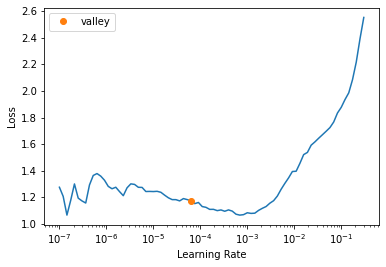

In [ ]:
learn1.unfreeze()
learn1.lr_find()

In [ ]:
learn1.fit_one_cycle(7, lr_max=1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.107897,1.583247,0.418182,00:15
1,1.156018,1.591516,0.381818,00:15
2,1.161129,1.524852,0.400000,00:15
3,1.149935,1.590399,0.400000,00:14
4,1.093085,1.524854,0.436364,00:15
5,1.086431,1.508922,0.454545,00:15
6,1.075549,1.507653,0.454545,00:14


In [ ]:
learn1 = cnn_learner(dls, resnet18, metrics=accuracy)
learn1.fit_one_cycle(3, 2e-3)
learn1.unfreeze()
learn1.fit_one_cycle(18, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,2.377171,1.674323,0.309091,00:11
1,2.005177,1.989095,0.381818,00:12
2,1.792699,2.178857,0.381818,00:11


epoch,train_loss,valid_loss,accuracy,time
0,1.473952,2.155953,0.381818,00:14
1,1.403192,2.104632,0.381818,00:14
2,1.401543,2.062045,0.363636,00:15
3,1.405096,2.019230,0.400000,00:15
4,1.343959,1.977556,0.400000,00:14
5,1.306119,1.961906,0.418182,00:14
6,1.315180,1.988015,0.381818,00:15
7,1.283682,1.942588,0.418182,00:15
8,1.248819,1.891619,0.436364,00:14
9,1.180432,1.854954,0.454545,00:15


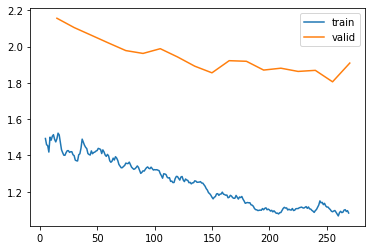

In [ ]:
learn1.recorder.plot_loss()

In [ ]:
learn1 = cnn_learner(dls, resnet18, metrics=accuracy, lr=2e-3)
learn1.fine_tune(17, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,2.466062,1.998991,0.218182,00:12
1,2.330809,1.470952,0.400000,00:11
2,1.956086,1.748097,0.381818,00:12


epoch,train_loss,valid_loss,accuracy,time
0,1.375726,1.775513,0.400000,00:15
1,1.266891,1.720601,0.418182,00:15
2,1.294335,1.801896,0.454545,00:15
3,1.201608,1.832472,0.490909,00:14
4,1.110739,1.967565,0.436364,00:15
5,0.970023,2.182574,0.509091,00:15
6,0.902401,2.055290,0.490909,00:15
7,0.855381,2.080061,0.563636,00:15
8,0.759541,2.198863,0.454545,00:15
9,0.736006,2.246049,0.545455,00:15


In [ ]:
learn1 = cnn_learner(dls, resnet18, metrics=accuracy, lr=2e-3)
learn.fine_tune(17, freeze_epochs=5)

epoch,train_loss,valid_loss,accuracy,time
0,0.436912,1.854970,0.490909,00:10
1,0.509666,1.888877,0.472727,00:10
2,0.526838,1.936127,0.454545,00:10
3,0.476322,2.065904,0.472727,00:10
4,0.457218,2.139106,0.472727,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.445225,2.013987,0.509091,00:13
1,0.420559,1.974761,0.509091,00:13
2,0.443609,2.000896,0.472727,00:13
3,0.426276,2.079447,0.509091,00:13
4,0.431293,2.350451,0.454545,00:13
5,0.455941,2.591772,0.436364,00:13
6,0.434612,2.246656,0.509091,00:13
7,0.425585,2.302612,0.545455,00:13
8,0.422029,2.481455,0.490909,00:13
9,0.397778,2.445980,0.563636,00:13


In [ ]:
learn1 = cnn_learner(dls, resnet18, metrics=accuracy, lr=2e-3)
learn1.fine_tune(17, freeze_epochs=7)

epoch,train_loss,valid_loss,accuracy,time
0,2.812132,2.157875,0.218182,00:11
1,2.605458,1.892942,0.345455,00:11
2,2.341517,1.841955,0.345455,00:11
3,2.024238,1.851231,0.327273,00:11
4,1.829498,1.852413,0.327273,00:11
5,1.728192,1.938823,0.363636,00:12
6,1.610333,1.574316,0.436364,00:11


epoch,train_loss,valid_loss,accuracy,time
0,1.001390,1.723895,0.363636,00:15
1,1.033776,1.752548,0.418182,00:15
2,1.010772,1.677969,0.454545,00:14
3,0.961474,1.822849,0.472727,00:15
4,0.944575,1.613615,0.545455,00:14
5,0.899176,2.050693,0.472727,00:15
6,0.851005,1.931782,0.490909,00:14
7,0.760235,1.881786,0.527273,00:15
8,0.683430,1.817453,0.563636,00:14
9,0.637360,2.170710,0.509091,00:14


### 2.3.2 Batch size of 64

In [ ]:
batch_size = 64
dls = fingers.dataloaders(path, bs=batch_size)

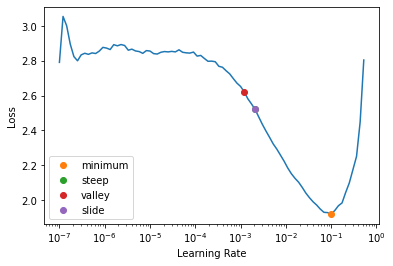

In [ ]:
learn2 = cnn_learner(dls, resnet18, metrics=accuracy_multi)
lr_min, lr_steep, lr_valley, lr_slide = learn2.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
print(f"Minimum/10:\t{lr_min:.2e}\nSteepest point:\t{lr_steep:.2e}\nLongest valley:\t{lr_valley:.2e}\nSlide interval:\t{lr_slide:.2e}")

Minimum/10:	1.00e-02
Steepest point:	2.09e-03
Longest valley:	1.20e-03
Slide interval:	2.09e-03


Chose 2e-3 again as a good choice od lr

In [ ]:
learn2 = cnn_learner(dls, resnet18, metrics=accuracy)
learn2.fit_one_cycle(5, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.716250,2.757192,0.145455,00:10
1,2.330833,2.343792,0.272727,00:10
2,2.118750,2.041924,0.254545,00:10
3,1.946913,1.777062,0.327273,00:10
4,1.835661,1.678993,0.345455,00:10


SuggestedLRs(valley=0.0002290867705596611)

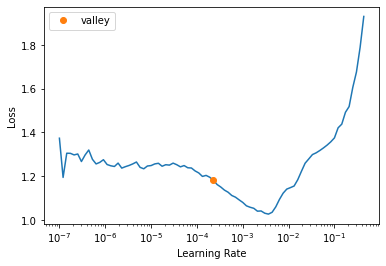

In [ ]:
learn2.unfreeze()
learn2.lr_find()

In [ ]:
learn2.fit_one_cycle(7, lr_max=1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,1.498176,1.675917,0.363636,00:12
1,1.376680,1.657795,0.381818,00:12
2,1.308930,1.616581,0.436364,00:12
3,1.321078,1.599571,0.436364,00:12
4,1.309327,1.595495,0.436364,00:12
5,1.302198,1.618205,0.436364,00:12
6,1.307560,1.645901,0.418182,00:12


In [ ]:
learn2 = cnn_learner(dls, resnet18, metrics=accuracy)
learn2.fit_one_cycle(3, 2e-3)
learn2.unfreeze()
learn2.fit_one_cycle(14, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,2.737742,1.958189,0.200000,00:10
1,2.507977,2.000126,0.272727,00:10
2,2.213347,1.765646,0.236364,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.551909,1.690894,0.218182,00:12
1,1.611482,1.722941,0.290909,00:12
2,1.662736,1.715484,0.290909,00:12
3,1.601463,1.687506,0.327273,00:12
4,1.614724,1.646958,0.345455,00:12
5,1.576903,1.592268,0.363636,00:12
6,1.577564,1.557998,0.418182,00:12
7,1.555806,1.530529,0.436364,00:12
8,1.536619,1.522507,0.418182,00:12
9,1.501814,1.525843,0.436364,00:12


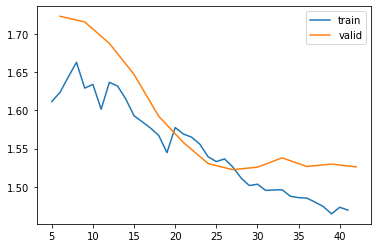

In [ ]:
learn2.recorder.plot_loss()

In [ ]:
learn2 = cnn_learner(dls, resnet18, metrics=accuracy, lr=2e-3)
learn2.fine_tune(8, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,2.831272,2.675636,0.200000,00:10
1,2.605945,2.236534,0.127273,00:10
2,2.383874,2.013496,0.272727,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.770492,1.742345,0.363636,00:12
1,1.731245,1.613280,0.381818,00:12
2,1.645244,1.525849,0.418182,00:12
3,1.511589,1.515361,0.472727,00:12
4,1.420064,1.561703,0.454545,00:12
5,1.346064,1.621014,0.490909,00:12
6,1.269132,1.647124,0.490909,00:12
7,1.214016,1.658106,0.509091,00:12


In [ ]:
learn2 = cnn_learner(dls, resnet18, metrics=accuracy, lr=2e-3)
learn2.fine_tune(8, freeze_epochs=5)

epoch,train_loss,valid_loss,accuracy,time
0,2.613426,2.116946,0.272727,00:10
1,2.635438,1.523536,0.327273,00:10
2,2.555266,1.371667,0.381818,00:10
3,2.359957,1.339751,0.563636,00:10
4,2.237960,1.348826,0.490909,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.546404,1.347608,0.472727,00:12
1,1.340929,1.327631,0.545455,00:12
2,1.320750,1.352745,0.509091,00:12
3,1.230623,1.405883,0.436364,00:12
4,1.166492,1.489796,0.472727,00:12
5,1.134042,1.536854,0.454545,00:12
6,1.094062,1.536550,0.490909,00:12
7,1.063570,1.529383,0.527273,00:12


In [ ]:
learn2 = cnn_learner(dls, resnet18, metrics=accuracy, lr=2e-3)
learn2.fine_tune(8, freeze_epochs=7)

epoch,train_loss,valid_loss,accuracy,time
0,2.961088,3.536943,0.218182,00:10
1,2.838721,2.509787,0.181818,00:10
2,2.720859,2.063252,0.254545,00:10
3,2.569938,1.787599,0.290909,00:10
4,2.420289,1.514890,0.345455,00:10
5,2.208116,1.436887,0.454545,00:10
6,2.047782,1.452446,0.381818,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.129621,1.536360,0.418182,00:12
1,1.080691,1.625797,0.436364,00:12
2,1.064935,1.756534,0.472727,00:12
3,1.080011,2.021468,0.490909,00:12
4,1.044166,2.090583,0.418182,00:12
5,1.021857,2.019716,0.436364,00:12
6,0.985030,1.986320,0.454545,00:12
7,0.938888,1.961981,0.454545,00:12


### Question 4: Keeping number of epochs and learning rates the same, how are validation loss and accuracy affected by the increase and decrease of batch size?
Increasing batch size obviously decreases the number of epochs required to get the best match. In case my images, a better match was achieved with the batch size of 16 where 

## 3. Analyze model performance

Retrain the model with batch size of 32 from the previous section.

Already trained with batch size of 32 and saved with name "learn"

Plot the confusion matrix.

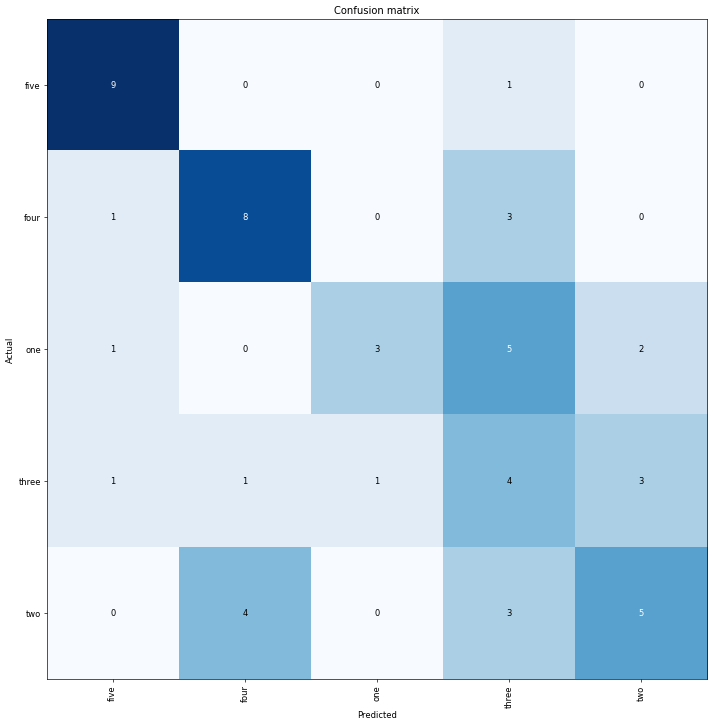

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## 4. Save the best model to file

Save the model using learn .export() as .pkl file. Verify that the model can be reloaded and used to make predictions.

The best model was learn1 with batch size of 16, 17 epochs, and freeze_epochs of 7. So, let's save it.

In [ ]:
export_path = path/'models'

In [ ]:
if not (export_path).exists():
  (export_path).mkdir()

In [ ]:
learn1.save('fingers')

Path('models/fingers.pth')

In [ ]:
learn1.export(fname=(export_path/'fingers_model.pkl'))

In [ ]:
(export_path).ls()

(#2) [Path('gdrive/My Drive/lab2/models/models'),Path('gdrive/My Drive/lab2/models/fingers_model.pkl')]

In [ ]:
learn_pkl = load_learner(export_path/'fingers_model.pkl')

In [ ]:
learn_pth = load_learner(export_path/'fingers.pth')

## 5. Summary and Conclusion

Summarize:

* Augmentations used: flip, light change, wrap, rotating, zoom in
* Training strategy, including batch size, number of epochs and learning rates: 3 batch size of 16, 32 and 64 were used. Number of epochs were chosen between 8 to 14, depending on the batch size and when the prediction stops improvement. Learning rate were chosen based on the cnn_learner, before and after freezing and tried to choose lower lr for the first layer of pre-trained ResNet18 and higher lr for the last layers.
* Accuracy achieved, summary of confusion matrix: accuracy did not go above 60% (with the lowest around 40%). The confusion matrix for batch size of 32 showed that the highest confusion for the model was prediction of two and four where model recognized those as three! Also four where the model predicted it as two. The best prediction was for five and it was mixed up with three only once.

Conclusion:

* Are you satisfied with model performance? Why, why not?
Not quite satistifid! Playing with hyperparameters did not end up with an accuracy of higher than 60%. Also, it was not necessarily consistent anytime I ran the whole code; e.g. the best out of all trials. 

## 6. Reflection

Include a sentence or two about

* what you liked or disliked: 
* found interesting, confusing, challangeing, motivating

while working on this assignment.

I liked the whole practice, it had pretty good and helpful stuff to learn. I also liked the challenges where something went wrong which made me study deeper. What I disliked was the inconsistency of different runs.
The challenge I had was about the unknown reason which disabled me to export/import the .pkl and .pth files properly. I followed the class examples and what advised by Dr. Pauchard; none of them worked! So far, it is not solved yet!